![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import shapiro
from scipy.stats import kstest

In [421]:
# Exploratory data analysis

women = pd.read_csv('women_results.csv', parse_dates=True)
men = pd.read_csv('men_results.csv', parse_dates=True)

#display(women.info())
display(women.head())
#display(women.describe())

#display(men.info())
display(men.head())
#display(men.describe())

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [422]:
# Filtering the data

women['goals'] = women['home_score'] + women['away_score']
men['goals'] = men['home_score'] + men['away_score']

women_fifa = women[women['tournament'] == 'FIFA World Cup']
men_fifa = men[men['tournament'] == 'FIFA World Cup']

women_fifa_2002 = women_fifa[women_fifa['date'] >= '2002-01-01']
men_fifa_2002 = men_fifa[men_fifa['date'] >= '2002-01-01']

display(women_fifa_2002.head())
display(len(women_fifa_2002))
display(men_fifa_2002.head())
display(len(men_fifa_2002))

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,goals
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


200

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,goals
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


384

<AxesSubplot: >

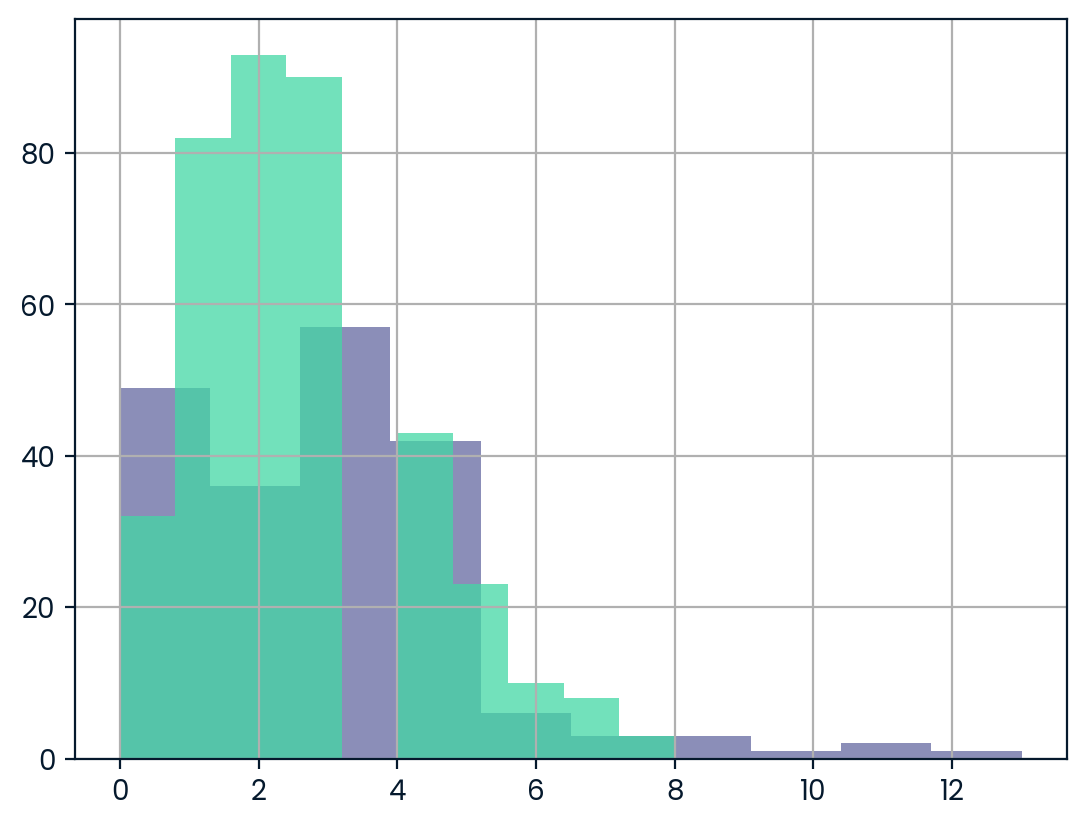

In [423]:
# Choosing the correct hypothesis test

women_fifa_2002['goals'].hist(alpha=0.75)
men_fifa_2002['goals'].hist(alpha=0.75)

In [424]:
# Shapiro-Wilk test

stat, p_value = shapiro(women_fifa_2002['goals'])

print("Shapiro-Wilk:", stat)
print("p-value:", p_value)

if p_value > 0.05:
    print("The data follows a normal distribution (p > 0.05).")
else:
    print("The data differs significally from a normal distribution (p <= 0.05).")

Shapiro-Wilk: 0.8491013050079346
p-value: 3.8905201759850683e-13
The data differs significally from a normal distribution (p <= 0.05).


In [425]:
# Kolmogorov-Smirnov test

stat, p_value = kstest(women_fifa_2002['goals'], 'norm', args=(np.mean(women_fifa_2002['goals']), np.std(women_fifa_2002['goals'])))

print("Kolmogorov-Smirnov:", stat)
print("p-value:", p_value)

if p_value > 0.05:
    print("The data follows a normal distribution (p > 0.05).")
else:
    print("The data differs significally from a normal distribution (p <= 0.05).")

Kolmogorov-Smirnov: 0.20604490349544835
p-value: 6.348960819170178e-08
The data differs significally from a normal distribution (p <= 0.05).


In [426]:
# Performing the hypothesis test (Wilcoxon_Mann_Whitney)

alpha = 0.1
test = pingouin.mwu(x=women_fifa_2002['goals'],
                    y=men_fifa_2002['goals'],
                    alternative='greater')

display(test)
p_val = test['p-val'].iloc[0]
display(p_val)

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


0.005106609825443641

In [427]:
# Interpreting the result of the hypothesis test

if p_val > alpha:
    result = 'fail to reject'
    print("Fail to reject hypothesis. No statistical significance between the two groups. (p > 0.1).")
else:
    result = 'reject'
    print("Reject hypothesis. Statistical significance between the two groups. (p < 0.1).")

result_dict = {"p_val": p_val, "result": result}
display(result_dict)

Reject hypothesis. Statistical significance between the two groups. (p < 0.1).


{'p_val': 0.005106609825443641, 'result': 'reject'}